In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/laptop_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1272 non-null   object 
 1   TypeName           1272 non-null   object 
 2   Inches             1272 non-null   float64
 3   resolution_width   1272 non-null   int64  
 4   resolution_height  1272 non-null   int64  
 5   Touchscreen        1272 non-null   int64  
 6   cpu_brand          1272 non-null   object 
 7   cpu_name           1272 non-null   object 
 8   cpu_speed          1272 non-null   float64
 9   Ram                1272 non-null   int64  
 10  memory_type        1271 non-null   object 
 11  primary_storage    1271 non-null   float64
 12  secondary_storage  1272 non-null   int64  
 13  gpu_brand          1272 non-null   object 
 14  OpSys              1209 non-null   object 
 15  Weight             1272 non-null   object 
 16  Price              1272 

In [8]:
df.isnull().sum()

Company               0
TypeName              0
Inches                0
resolution_width      0
resolution_height     0
Touchscreen           0
cpu_brand             0
cpu_name              0
cpu_speed             0
Ram                   0
memory_type           1
primary_storage       1
secondary_storage     0
gpu_brand             0
OpSys                63
Weight                0
Price                 0
dtype: int64

In [27]:
df[df['OpSys'].isnull()]

,Company,TypeName,Inches,resolution_width,resolution_height,Touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,Price
2,HP,Notebook,15.6,1920,1080,0,Intel,Core i5,2.5,8,SSD,256.0,0,Intel,NaN,1.86,30636
10,HP,Notebook,15.6,1366,768,0,Intel,Core i5,2.5,4,HDD,500.0,0,Intel,NaN,1.86,20987
11,HP,Notebook,15.6,1920,1080,0,Intel,Core i3,2.0,4,HDD,500.0,0,Intel,NaN,1.86,18381
18,Lenovo,Notebook,15.6,1920,1080,0,Intel,Core i3,2.4,8,HDD,1024.0,0,Nvidia,NaN,2.2,26587
21,HP,Notebook,15.6,1366,768,0,AMD,E-Series E2-9000e,1.5,4,HDD,500.0,0,AMD,NaN,1.86,13746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,Lenovo,Notebook,15.6,1920,1080,0,Intel,Core i7,2.7,8,HDD,1024.0,0,Nvidia,NaN,2.2,37776
1167,Lenovo,Notebook,15.6,1366,768,0,Intel,Core i3,2.0,4,HDD,1024.0,0,AMD,NaN,1.9,19607
1172,Lenovo,Notebook,15.6,1366,768,0,Intel,Core i7,2.5,8,HDD,500.0,0,Nvidia,NaN,2.2,33513
1187,Lenovo,Notebook,17.3,1600,900,0,Intel,Core i5,2.5,8,HDD,1024.0,0,Intel,NaN,2.8,28718


In [161]:
laptop_data=df.copy()

# Filling missing value

In [162]:
# Fill missing values
laptop_data['memory_type'].fillna(laptop_data['memory_type'].mode()[0], inplace=True)
laptop_data['primary_storage'].fillna(laptop_data['primary_storage'].median(), inplace=True)
laptop_data['OpSys'].fillna(laptop_data['OpSys'].mode()[0], inplace=True)

In [163]:
# Verify that there are no more missing values
laptop_data.isnull().sum()

Company              0
TypeName             0
Inches               0
resolution_width     0
resolution_height    0
Touchscreen          0
cpu_brand            0
cpu_name             0
cpu_speed            0
Ram                  0
memory_type          0
primary_storage      0
secondary_storage    0
gpu_brand            0
OpSys                0
Weight               0
Price                0
dtype: int64

# Dealing with numerical columns

In [164]:
laptop_data.head()

,Company,TypeName,Inches,resolution_width,resolution_height,Touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,2.3,8,SSD,128.0,0,Intel,macOS,1.37,71379
1,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash Storage,128.0,0,Intel,macOS,1.34,47896
2,HP,Notebook,15.6,1920,1080,0,Intel,Core i5,2.5,8,SSD,256.0,0,Intel,WindowOS,1.86,30636
3,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.7,16,SSD,512.0,0,AMD,macOS,1.83,135195
4,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,3.1,8,SSD,256.0,0,Intel,macOS,1.37,96096


# Five number summary on numerical columns

In [165]:
five_number_summary = laptop_data.describe().loc[['min', '25%', '50%', '75%', 'max']]
five_number_summary

,Inches,resolution_width,resolution_height,Touchscreen,cpu_speed,Ram,primary_storage,secondary_storage,Price
min,10.1,1366.0,768.0,0.0,0.9,1.0,8.0,0.0,9271.0
25%,14.0,1600.0,900.0,0.0,2.0,4.0,256.0,0.0,31915.0
50%,15.6,1920.0,1080.0,0.0,2.5,8.0,256.0,0.0,52108.0
75%,15.6,1920.0,1080.0,0.0,2.7,8.0,512.0,0.0,79244.5
max,35.6,3840.0,2160.0,1.0,3.6,64.0,2048.0,2048.0,324955.0


# Calculate IQR and detect outliers

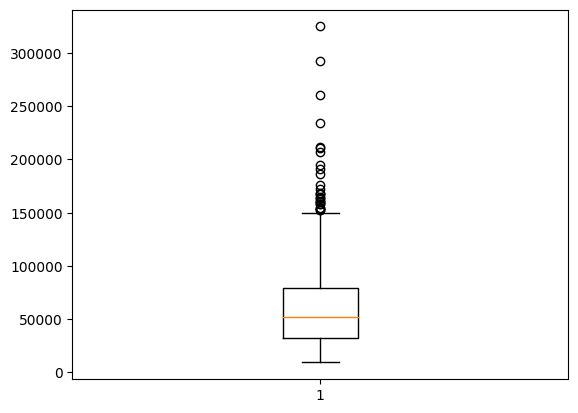

In [166]:
plt.boxplot(laptop_data['Price'])
plt.show()

In [167]:
Q1 = laptop_data['Price'].quantile(0.25)
Q3 = laptop_data['Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [168]:
laptop_data=laptop_data[~((laptop_data['Price']<lower_bound)|(laptop_data['Price']>upper_bound))]

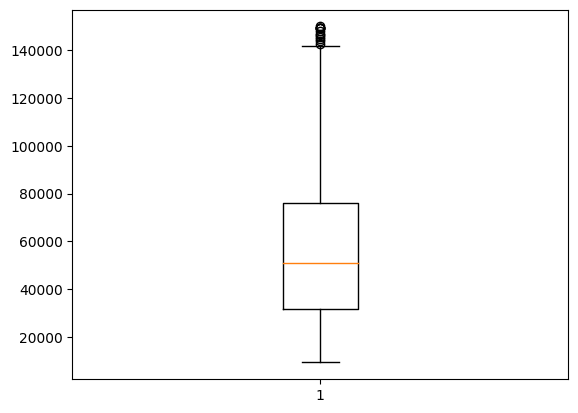

In [169]:
plt.boxplot(laptop_data['Price'])
plt.show()

In [170]:
laptop_data.head()

,Company,TypeName,Inches,resolution_width,resolution_height,Touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,2.3,8,SSD,128.0,0,Intel,macOS,1.37,71379
1,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash Storage,128.0,0,Intel,macOS,1.34,47896
2,HP,Notebook,15.6,1920,1080,0,Intel,Core i5,2.5,8,SSD,256.0,0,Intel,WindowOS,1.86,30636
3,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.7,16,SSD,512.0,0,AMD,macOS,1.83,135195
4,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,3.1,8,SSD,256.0,0,Intel,macOS,1.37,96096


# Numerical columns plot

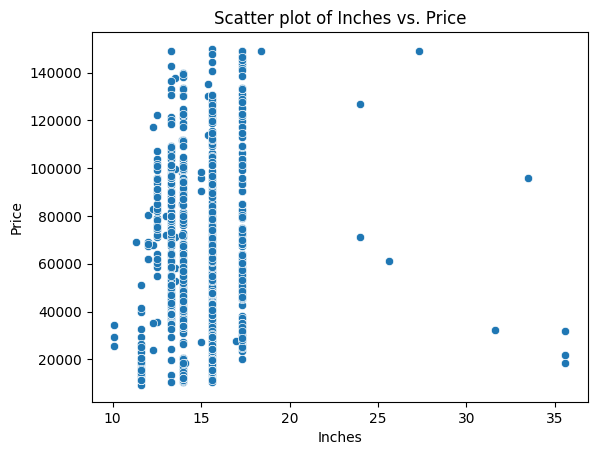

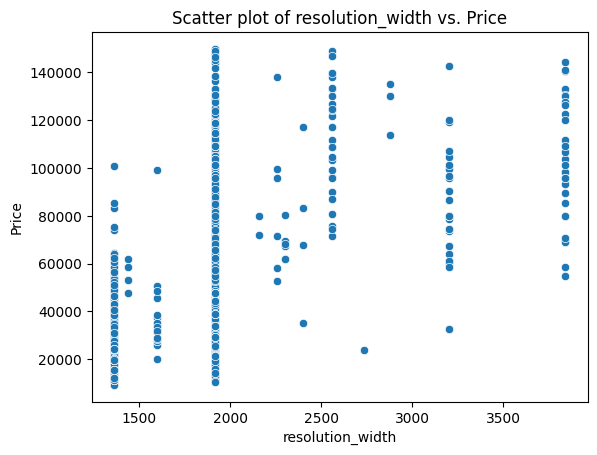

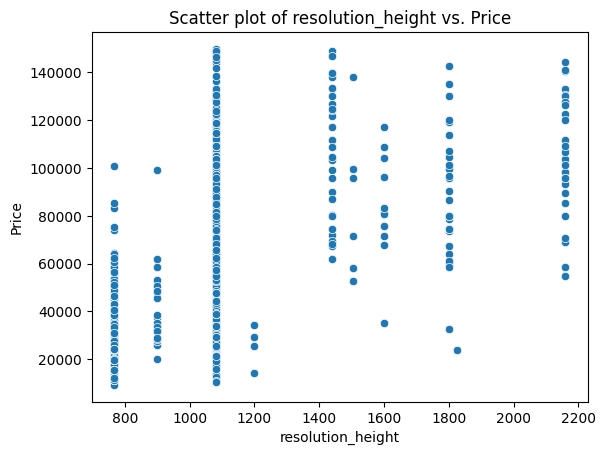

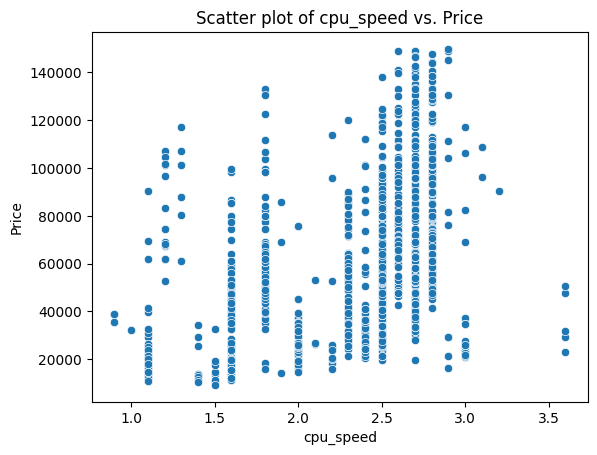

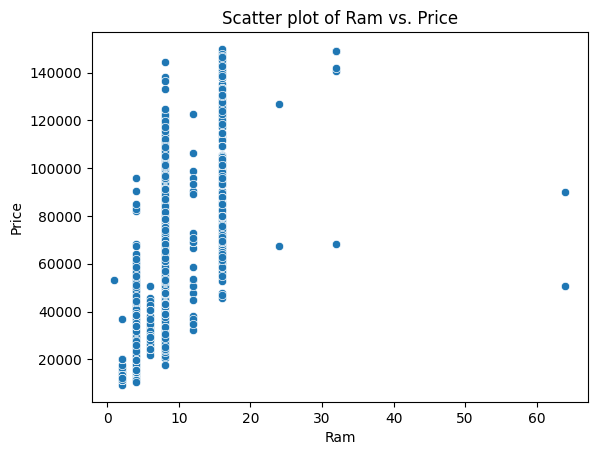

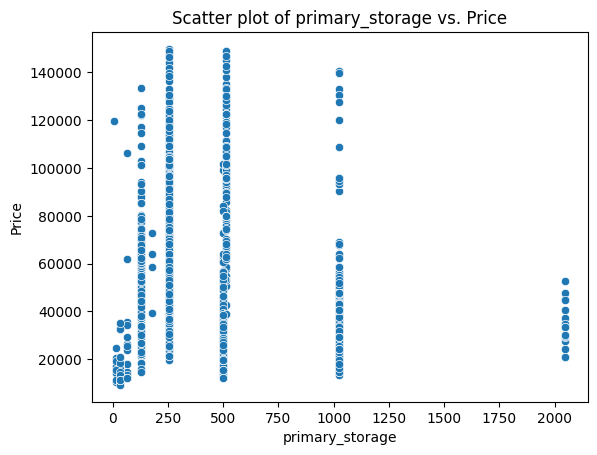

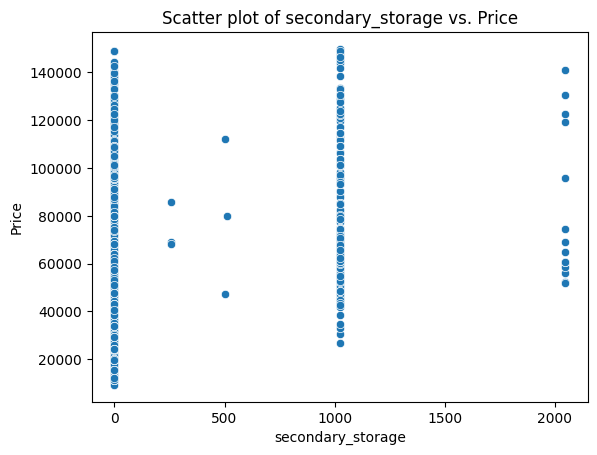

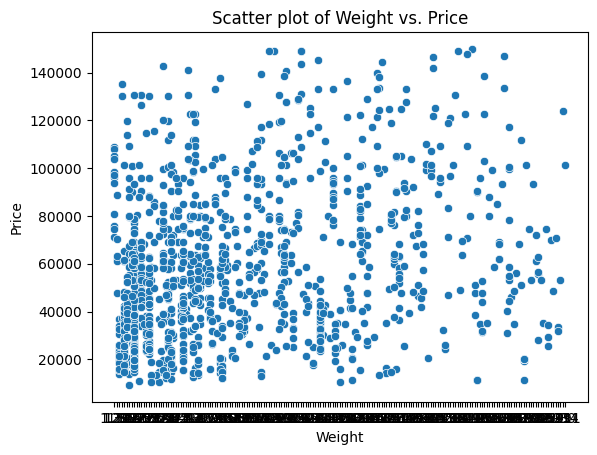

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols=['Inches','resolution_width','resolution_height','cpu_speed','Ram','primary_storage','secondary_storage','Weight']

# Create scatter plots
for col in numerical_cols:
  plt.figure()  # Create a new figure for each plot
  sns.scatterplot(x=col, y='Price', data=laptop_data)
  plt.title(f'Scatter plot of {col} vs. Price')
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.show()


In [172]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1271
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1244 non-null   object 
 1   TypeName           1244 non-null   object 
 2   Inches             1244 non-null   float64
 3   resolution_width   1244 non-null   int64  
 4   resolution_height  1244 non-null   int64  
 5   Touchscreen        1244 non-null   int64  
 6   cpu_brand          1244 non-null   object 
 7   cpu_name           1244 non-null   object 
 8   cpu_speed          1244 non-null   float64
 9   Ram                1244 non-null   int64  
 10  memory_type        1244 non-null   object 
 11  primary_storage    1244 non-null   float64
 12  secondary_storage  1244 non-null   int64  
 13  gpu_brand          1244 non-null   object 
 14  OpSys              1244 non-null   object 
 15  Weight             1244 non-null   object 
 16  Price              1244 non-n

In [173]:
laptop_data.Weight.sort_values(ascending=False)

201          ?
573        8.4
317       8.23
232        7.2
128        7.2
         ...  
789       0.81
1085      0.69
1053      0.69
1097      0.69
339     0.0002
Name: Weight, Length: 1244, dtype: object

In [174]:
laptop_data=laptop_data[~(laptop_data['Weight']=='?')]

In [175]:
laptop_data.Weight.sort_values(ascending=False)

573        8.4
317       8.23
232        7.2
128        7.2
639        6.2
         ...  
789       0.81
1085      0.69
1053      0.69
1097      0.69
339     0.0002
Name: Weight, Length: 1243, dtype: object

In [176]:
laptop_data.Weight=laptop_data.Weight.astype('float')

In [177]:
numerical_cols=['Inches','resolution_width','resolution_height','cpu_speed','Ram','primary_storage','secondary_storage','Weight','Price']
laptop_data[numerical_cols].corr()

,Inches,resolution_width,resolution_height,cpu_speed,Ram,primary_storage,secondary_storage,Weight,Price
Inches,1.000000,-0.079589,-0.091256,0.188677,0.106280,0.184406,0.273562,0.483378,-0.015225
resolution_width,-0.079589,1.000000,0.993441,0.163536,0.391226,-0.103532,0.140186,-0.106014,0.536105
resolution_height,-0.091256,0.993441,1.000000,0.148688,0.382657,-0.110206,0.128928,-0.123429,0.534189
cpu_speed,0.188677,0.163536,0.148688,1.000000,0.322349,0.054223,0.223510,0.253272,0.428435
Ram,0.106280,0.391226,0.382657,0.322349,1.000000,-0.030571,0.362512,0.203283,0.642586
primary_storage,0.184406,-0.103532,-0.110206,0.054223,-0.030571,1.000000,-0.252000,0.148097,-0.191930
secondary_storage,0.273562,0.140186,0.128928,0.223510,0.362512,-0.252000,1.000000,0.361493,0.318320
Weight,0.483378,-0.106014,-0.123429,0.253272,0.203283,0.148097,0.361493,1.000000,0.068185
Price,-0.015225,0.536105,0.534189,0.428435,0.642586,-0.191930,0.318320,0.068185,1.000000


<Axes: >

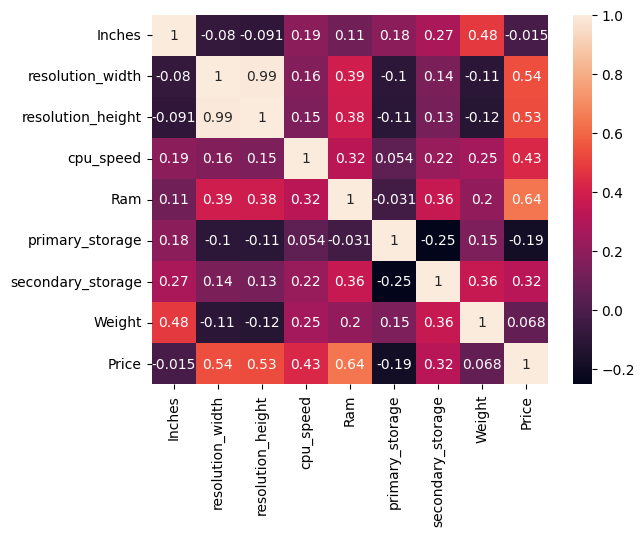

In [178]:
sns.heatmap(laptop_data[numerical_cols].corr(),annot=True)

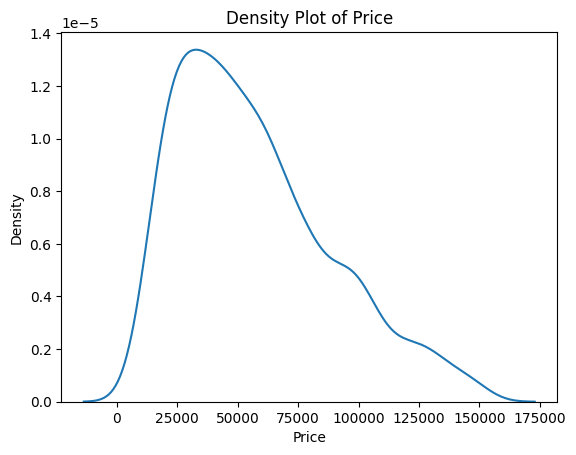

In [179]:
#density plot of price

import matplotlib.pyplot as plt
sns.kdeplot(laptop_data['Price'])
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


# Categorical columns plot

In [180]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1271
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1243 non-null   object 
 1   TypeName           1243 non-null   object 
 2   Inches             1243 non-null   float64
 3   resolution_width   1243 non-null   int64  
 4   resolution_height  1243 non-null   int64  
 5   Touchscreen        1243 non-null   int64  
 6   cpu_brand          1243 non-null   object 
 7   cpu_name           1243 non-null   object 
 8   cpu_speed          1243 non-null   float64
 9   Ram                1243 non-null   int64  
 10  memory_type        1243 non-null   object 
 11  primary_storage    1243 non-null   float64
 12  secondary_storage  1243 non-null   int64  
 13  gpu_brand          1243 non-null   object 
 14  OpSys              1243 non-null   object 
 15  Weight             1243 non-null   float64
 16  Price              1243 non-n

In [181]:
colms=['Company','TypeName','OpSys','memory_type','cpu_brand','cpu_name','gpu_brand']

In [182]:
categorical_feature=laptop_data[colms]

In [183]:
categorical_feature.head()

,Company,TypeName,OpSys,memory_type,cpu_brand,cpu_name,gpu_brand
0,Apple,Ultrabook,macOS,SSD,Intel,Core i5,Intel
1,Apple,Ultrabook,macOS,Flash Storage,Intel,Core i5,Intel
2,HP,Notebook,WindowOS,SSD,Intel,Core i5,Intel
3,Apple,Ultrabook,macOS,SSD,Intel,Core i7,AMD
4,Apple,Ultrabook,macOS,SSD,Intel,Core i5,Intel


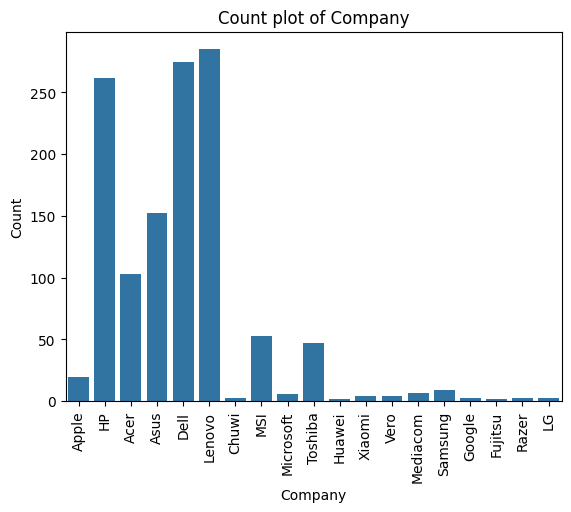

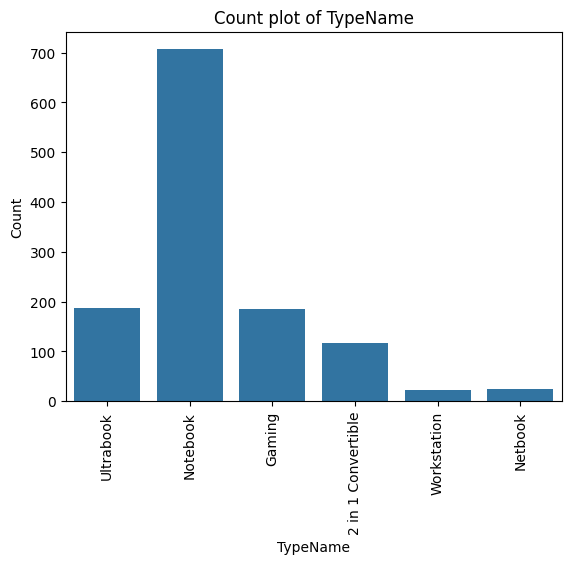

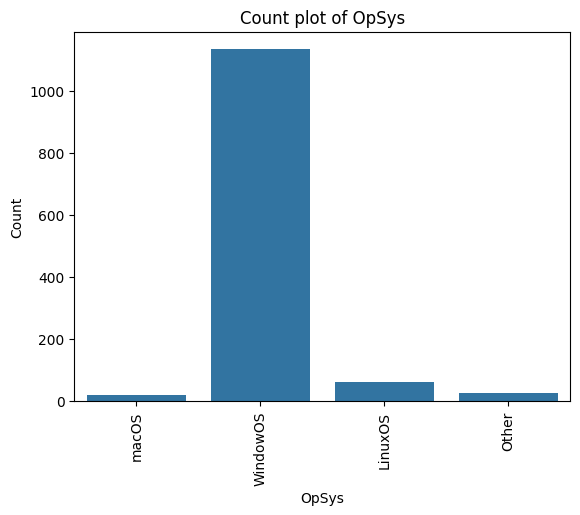

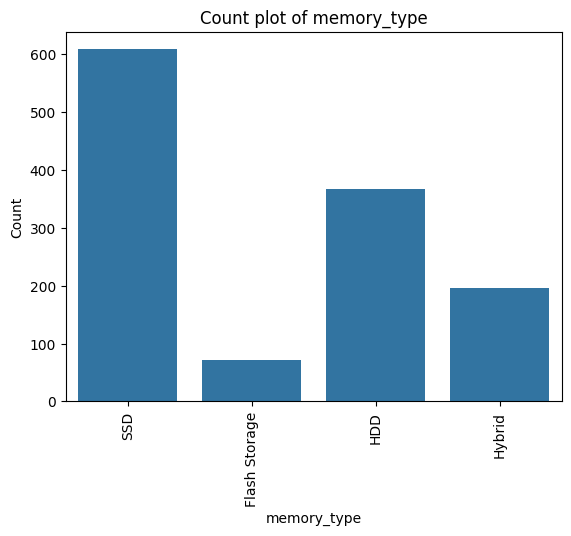

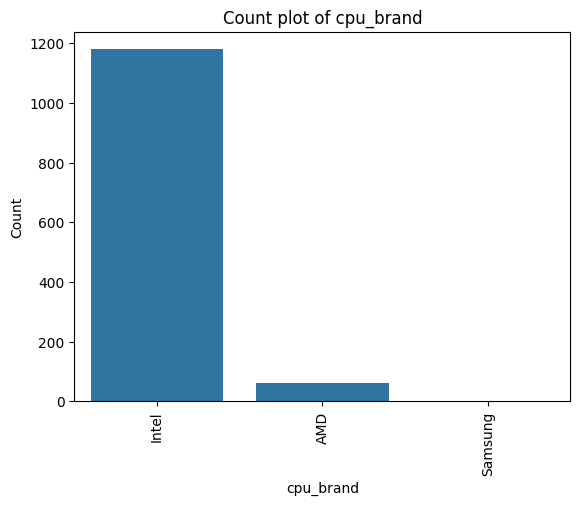

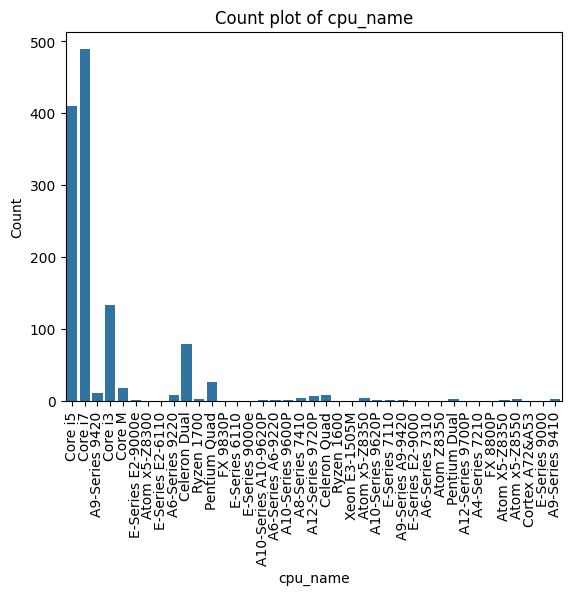

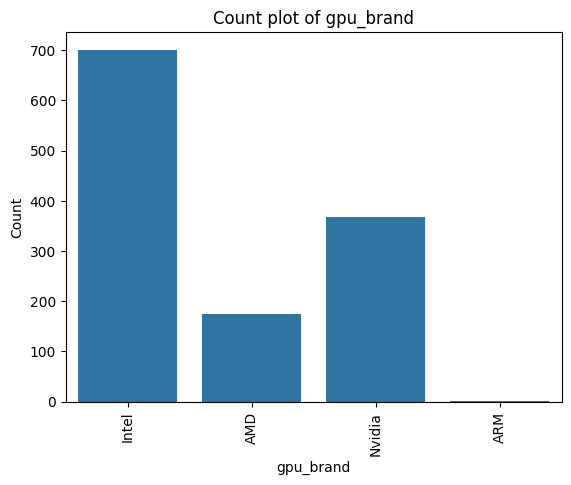

In [184]:
import matplotlib.pyplot as plt
# Create count plots for categorical features
for col in categorical_feature:
  plt.figure()
  sns.countplot(x=col, data=laptop_data)
  plt.title(f'Count plot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()


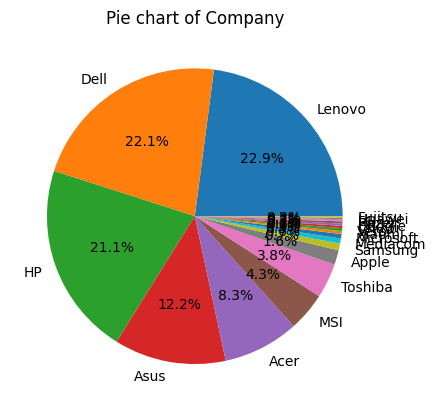

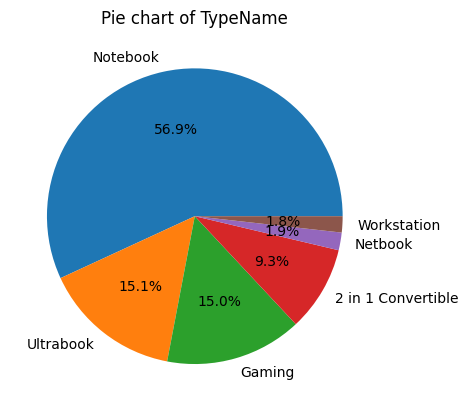

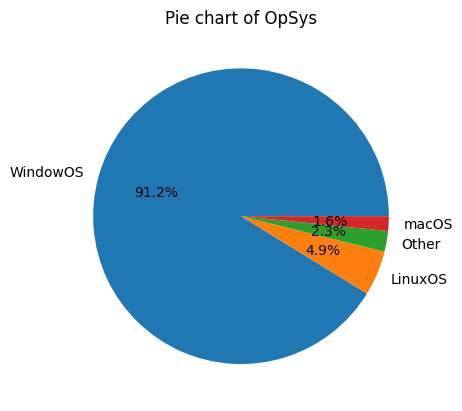

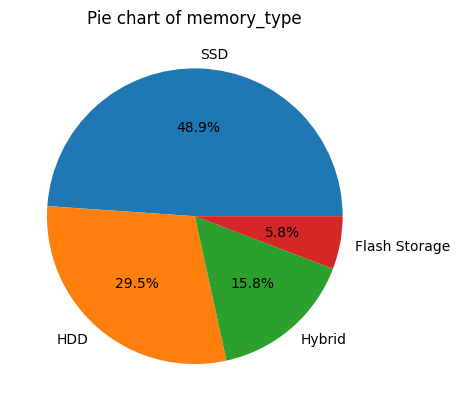

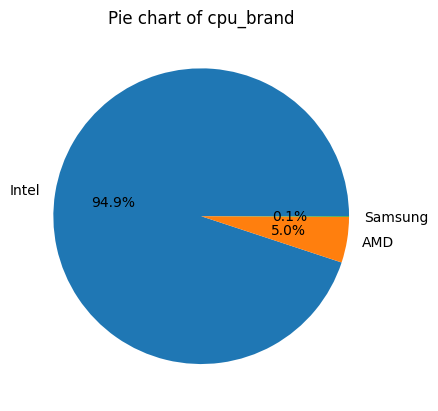

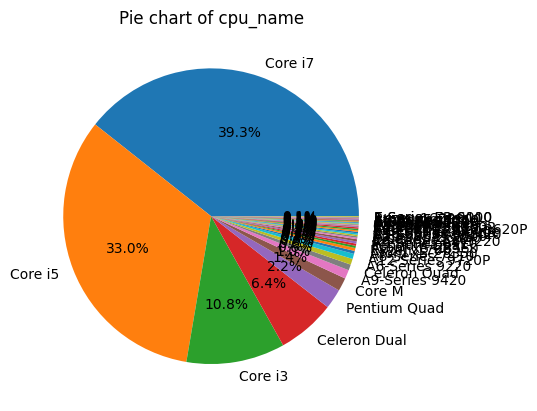

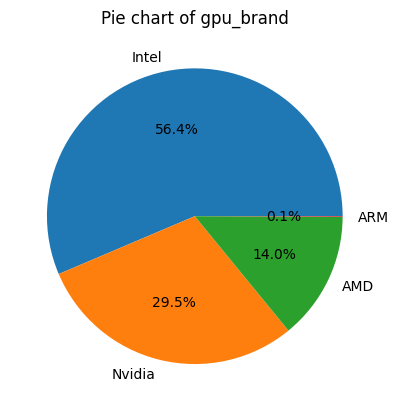

In [185]:
import matplotlib.pyplot as plt
# Create pie charts for categorical features
for col in categorical_feature:
  plt.figure()
  value_counts = laptop_data[col].value_counts()
  plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
  plt.title(f'Pie chart of {col}')
  plt.show()


TypeName   2 in 1 Convertible  Gaming  Netbook  Notebook  Ultrabook  \
Company                                                               
Acer                        8       8        5        78          4   
Apple                       0       0        0         0         20   
Asus                       13      49        3        67         20   
Chuwi                       0       0        0         3          0   
Dell                       28      32        2       159         46   
Fujitsu                     0       0        0         2          0   
Google                      0       0        0         0          3   
HP                         18      12        9       179         33   
Huawei                      0       0        0         0          2   
LG                          0       0        0         0          3   
Lenovo                     46      31        4       171         30   
MSI                         0      53        0         0          0   
Mediac

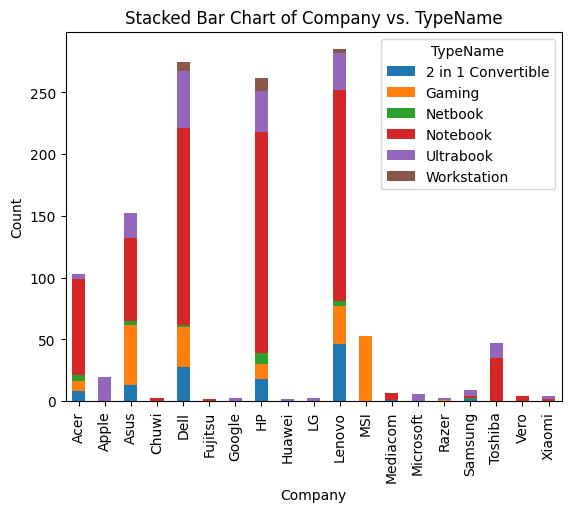

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
# Contingency table for Company and TypeName
contingency_table = pd.crosstab(laptop_data['Company'], laptop_data['TypeName'])
print(contingency_table)

# Stacked bar chart for Company and TypeName
contingency_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Company vs. TypeName')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='TypeName')
plt.show()


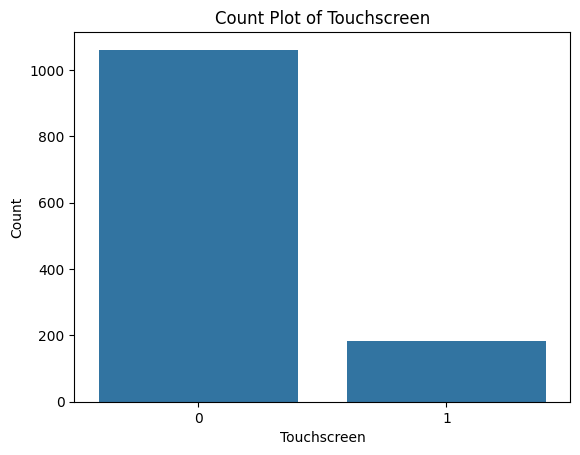

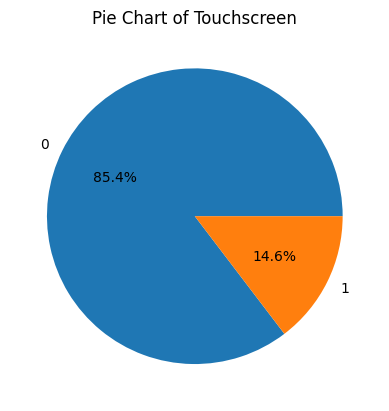

In [187]:
import matplotlib.pyplot as plt
# Count plot for Touchscreen
plt.figure()
sns.countplot(x='Touchscreen', data=laptop_data)
plt.title('Count Plot of Touchscreen')
plt.xlabel('Touchscreen')
plt.ylabel('Count')
plt.show()

# Pie chart for Touchscreen
plt.figure()
value_counts = laptop_data['Touchscreen'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Touchscreen')
plt.show()

# Data analysis

In [193]:
import matplotlib.pyplot as plt
# Group data by company and calculate average price
average_price_by_company = laptop_data.groupby('Company')['Price'].mean().sort_values(ascending=False)
print(average_price_by_company)

Company
LG           111835.000000
Razer         96383.666667
MSI           91814.603774
Google        89386.333333
Microsoft     85903.833333
Apple         79893.900000
Huawei        75871.000000
Samsung       75308.555556
Toshiba       66747.382979
Xiaomi        60391.000000
Dell          59128.261818
Lenovo        55837.561404
Asus          55675.822368
HP            55172.290076
Fujitsu       38575.000000
Acer          33394.631068
Chuwi         16745.666667
Mediacom      15717.571429
Vero          11584.500000
Name: Price, dtype: float64


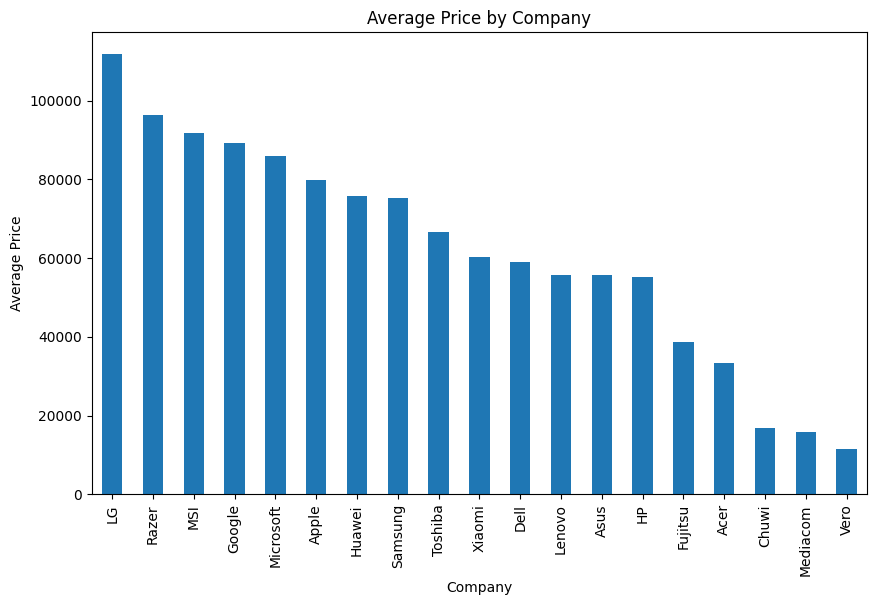

In [194]:
import matplotlib.pyplot as plt
# Plot average price by company
plt.figure(figsize=(10, 6))
average_price_by_company.plot(kind='bar')
plt.title('Average Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


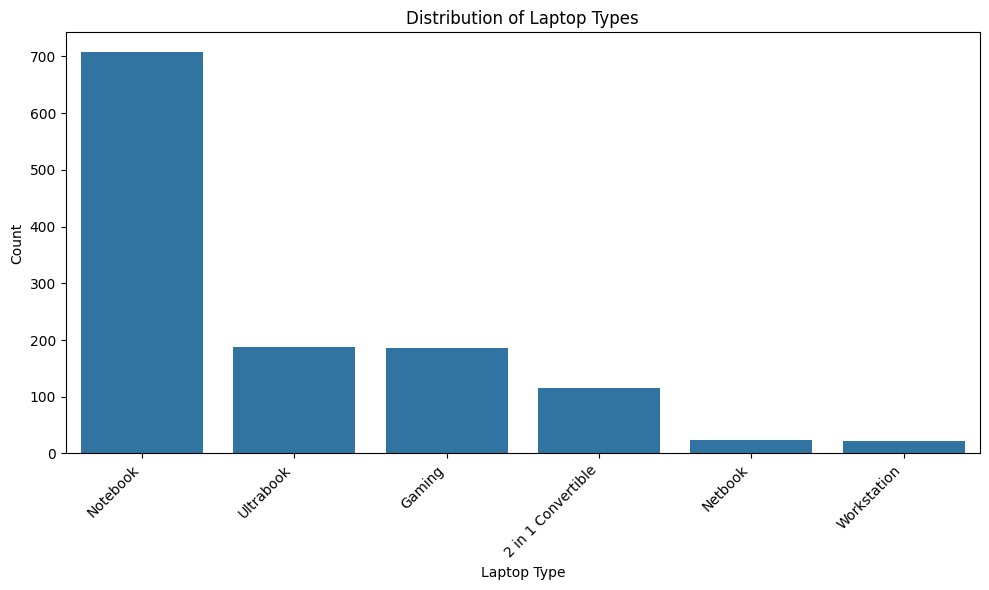

In [195]:
# Distribution of laptop types
laptop_type_counts = laptop_data['TypeName'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=laptop_type_counts.index, y=laptop_type_counts.values)
plt.xlabel('Laptop Type')
plt.ylabel('Count')
plt.title('Distribution of Laptop Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

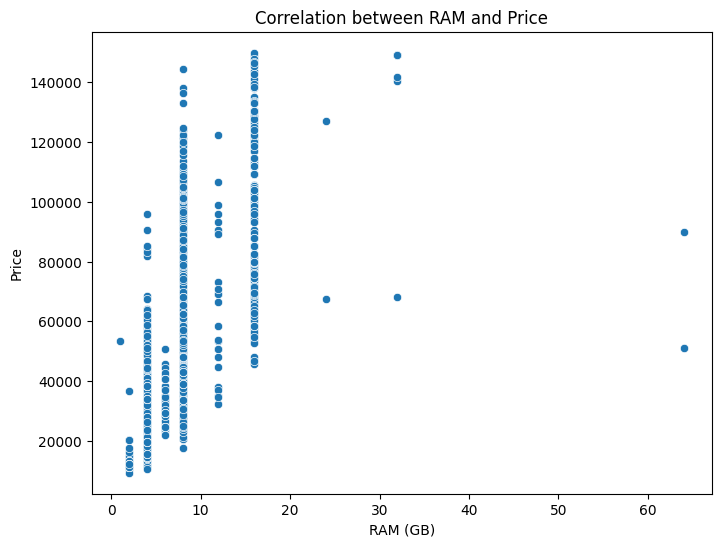

In [196]:
# Correlation between RAM and Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ram', y='Price', data=laptop_data)
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.title('Correlation between RAM and Price')
plt.show()

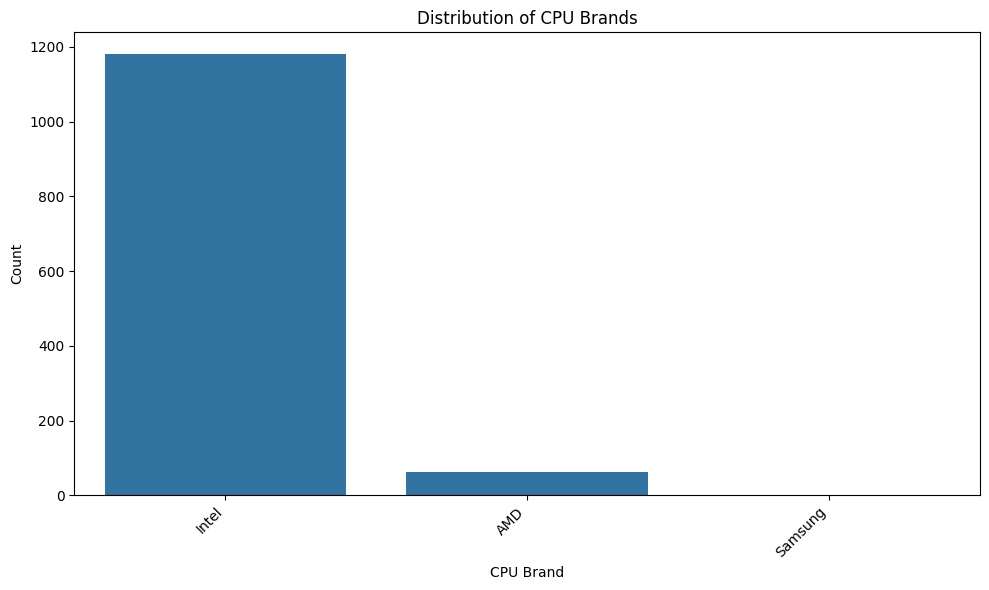

In [197]:
# Analyze the distribution of CPU brands
cpu_brand_counts = laptop_data['cpu_brand'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=cpu_brand_counts.index, y=cpu_brand_counts.values)
plt.xlabel('CPU Brand')
plt.ylabel('Count')
plt.title('Distribution of CPU Brands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

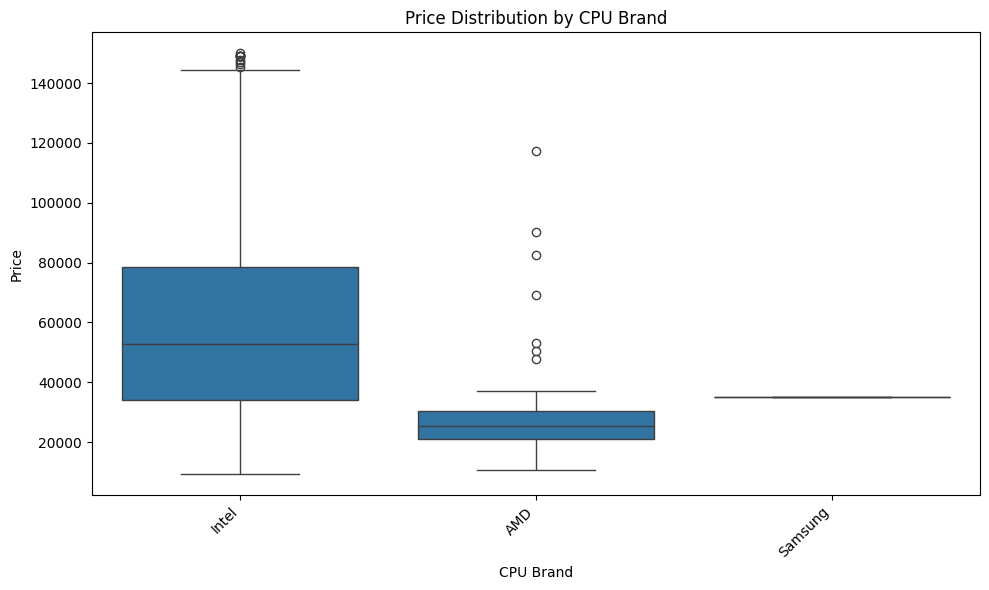

In [198]:
# Explore the relationship between CPU brand and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='cpu_brand', y='Price', data=laptop_data)
plt.xlabel('CPU Brand')
plt.ylabel('Price')
plt.title('Price Distribution by CPU Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

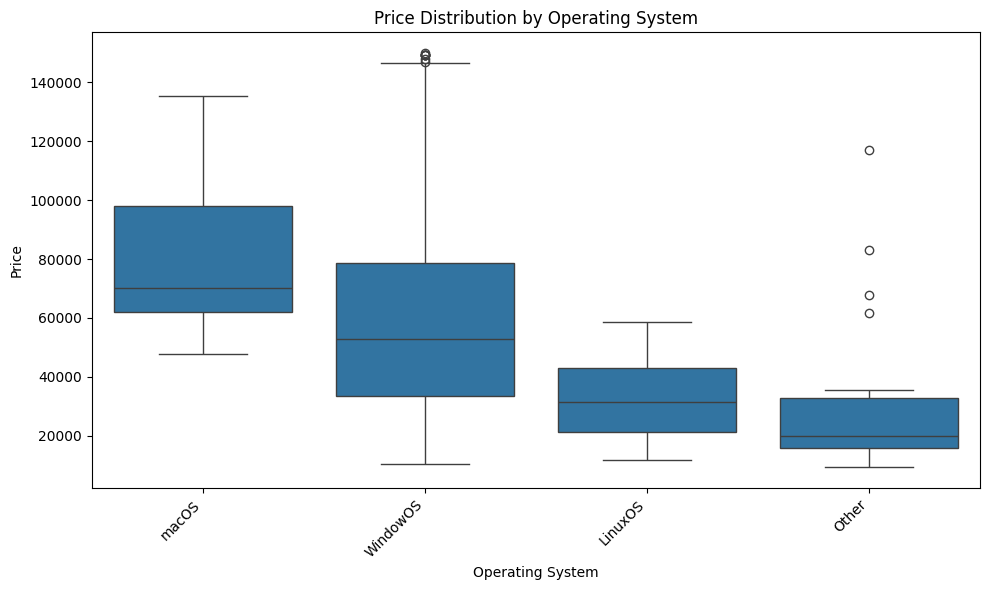

In [199]:
# Investigate the impact of operating system on price
plt.figure(figsize=(10, 6))
sns.boxplot(x='OpSys', y='Price', data=laptop_data)
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Price Distribution by Operating System')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

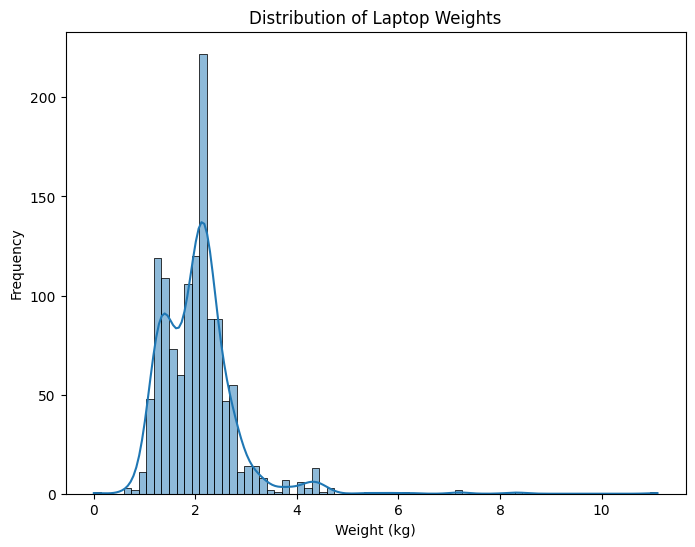

In [200]:
import matplotlib.pyplot as plt
# Analyze the distribution of laptop weights
plt.figure(figsize=(8, 6))
sns.histplot(laptop_data['Weight'], kde=True)
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Laptop Weights')
plt.show()

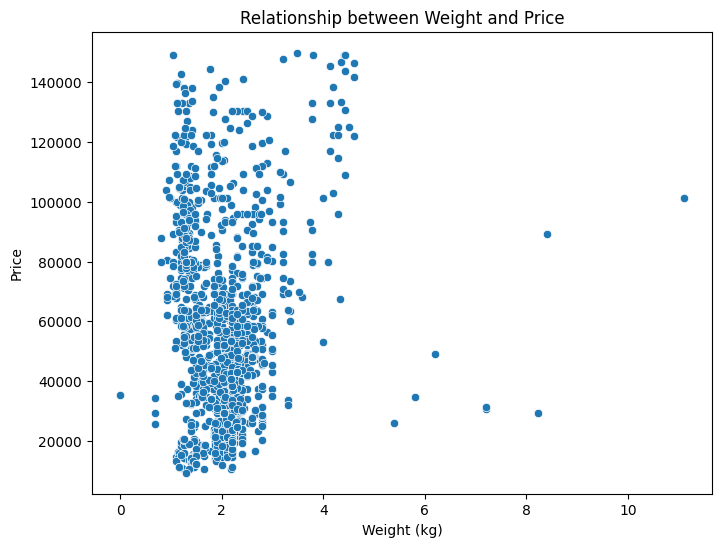

In [201]:
# Explore the relationship between weight and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Price', data=laptop_data)
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.title('Relationship between Weight and Price')
plt.show()

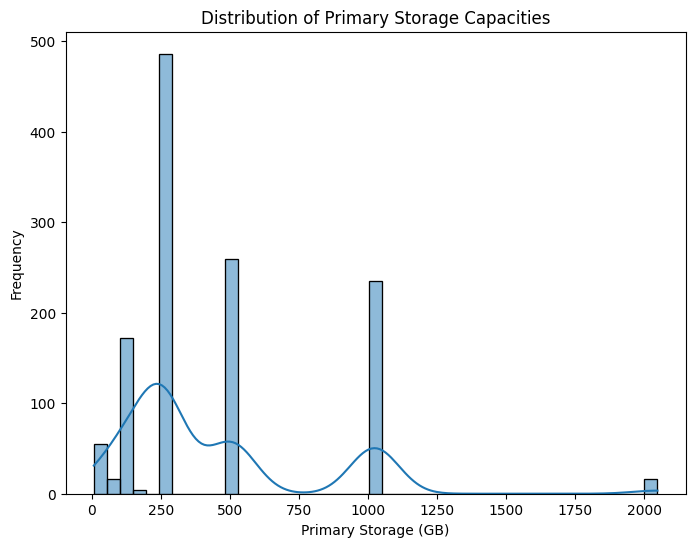

In [202]:
# Analyze the distribution of primary storage capacities
plt.figure(figsize=(8, 6))
sns.histplot(laptop_data['primary_storage'], kde=True)
plt.xlabel('Primary Storage (GB)')
plt.ylabel('Frequency')
plt.title('Distribution of Primary Storage Capacities')
plt.show()

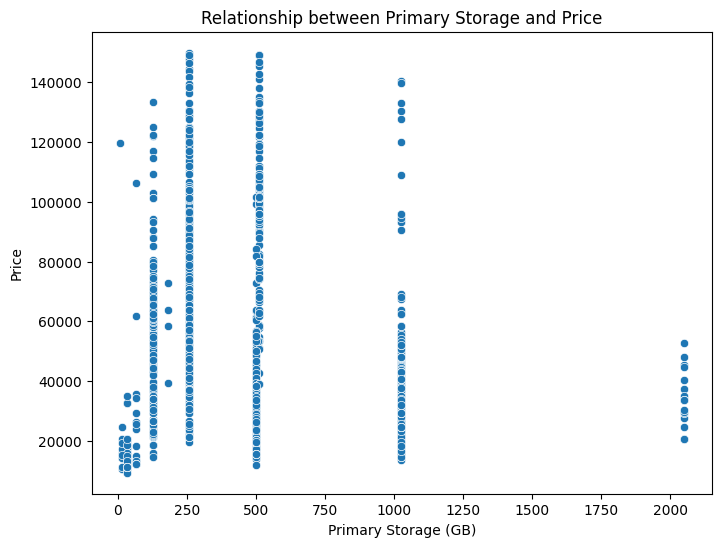

In [203]:
# Explore the relationship between primary storage and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='primary_storage', y='Price', data=laptop_data)
plt.xlabel('Primary Storage (GB)')
plt.ylabel('Price')
plt.title('Relationship between Primary Storage and Price')
plt.show()

#  Feature engineering

In [188]:
laptop_data.head()

,Company,TypeName,Inches,resolution_width,resolution_height,Touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,2.3,8,SSD,128.0,0,Intel,macOS,1.37,71379
1,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash Storage,128.0,0,Intel,macOS,1.34,47896
2,HP,Notebook,15.6,1920,1080,0,Intel,Core i5,2.5,8,SSD,256.0,0,Intel,WindowOS,1.86,30636
3,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.7,16,SSD,512.0,0,AMD,macOS,1.83,135195
4,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,3.1,8,SSD,256.0,0,Intel,macOS,1.37,96096


In [189]:
# Calculate PPI (Pixels Per Inch)
laptop_data['PPI'] = (((laptop_data['resolution_width']**2) + (laptop_data['resolution_height']**2))**0.5) / laptop_data['Inches']
laptop_data.head()

,Company,TypeName,Inches,resolution_width,resolution_height,Touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,Price,PPI
0,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,2.3,8,SSD,128.0,0,Intel,macOS,1.37,71379,226.983005
1,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash Storage,128.0,0,Intel,macOS,1.34,47896,127.677940
2,HP,Notebook,15.6,1920,1080,0,Intel,Core i5,2.5,8,SSD,256.0,0,Intel,WindowOS,1.86,30636,141.211998
3,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.7,16,SSD,512.0,0,AMD,macOS,1.83,135195,220.534624
4,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,3.1,8,SSD,256.0,0,Intel,macOS,1.37,96096,226.983005


In [190]:
# Drop non-useful columns
laptop_data.drop(columns=['Inches','resolution_width','resolution_height'],inplace=True)
laptop_data.head()

,Company,TypeName,Touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,Price,PPI
0,Apple,Ultrabook,0,Intel,Core i5,2.3,8,SSD,128.0,0,Intel,macOS,1.37,71379,226.983005
1,Apple,Ultrabook,0,Intel,Core i5,1.8,8,Flash Storage,128.0,0,Intel,macOS,1.34,47896,127.677940
2,HP,Notebook,0,Intel,Core i5,2.5,8,SSD,256.0,0,Intel,WindowOS,1.86,30636,141.211998
3,Apple,Ultrabook,0,Intel,Core i7,2.7,16,SSD,512.0,0,AMD,macOS,1.83,135195,220.534624
4,Apple,Ultrabook,0,Intel,Core i5,3.1,8,SSD,256.0,0,Intel,macOS,1.37,96096,226.983005


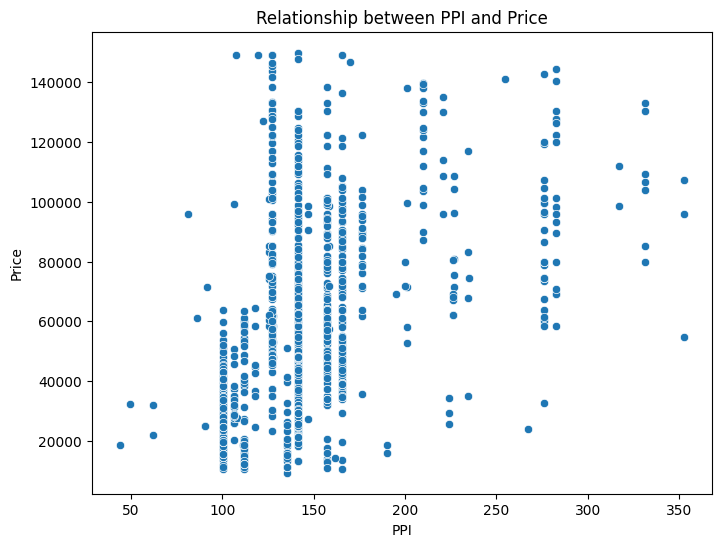

In [204]:
# Explore the relationship between PPI and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PPI', y='Price', data=laptop_data)
plt.xlabel('PPI')
plt.ylabel('Price')
plt.title('Relationship between PPI and Price')
plt.show()